In [32]:
#import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

plt.style.use('ggplot')

In [8]:
df = pd.read_csv('yield_df.csv')

df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## **Data cleaning**

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [12]:
african_countries = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
    'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
    'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt', 'Equatorial Guinea',
    'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
    'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya',
    'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco',
    'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan',
    'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

df_africa = df[df['Area'].isin(african_countries)]


In [13]:
df_africa.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
99,Algeria,Maize,1990,16500,89.0,1828.92,17.48
100,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
101,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
102,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
103,Algeria,Wheat,1990,6315,89.0,1828.92,17.48


In [14]:
df_africa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5523 entries, 99 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           5523 non-null   object 
 1   Item                           5523 non-null   object 
 2   Year                           5523 non-null   int64  
 3   hg/ha_yield                    5523 non-null   int64  
 4   average_rain_fall_mm_per_year  5523 non-null   float64
 5   pesticides_tonnes              5523 non-null   float64
 6   avg_temp                       5523 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 345.2+ KB


In [15]:
df_africa.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [16]:
df_africa.duplicated().sum()

np.int64(161)

In [17]:
df_africa.drop_duplicates(inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26692\2252833906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa.drop_duplicates(inplace=True)


In [18]:
df_africa.duplicated().sum()

np.int64(0)

In [19]:
df_africa.shape

(5362, 7)

In [20]:
df_africa.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,5362.000000,5362.000000,5362.000000,5362.000000,5362.000000
mean,2001.587840,54525.229579,785.496643,3944.720576,22.302631
std,7.079519,65639.272364,526.756508,7241.247514,3.864485
min,1990.000000,849.000000,51.000000,0.040000,13.930000
25%,1995.000000,11656.500000,346.000000,68.010000,19.740000
50%,2001.000000,25681.500000,686.000000,422.240000,21.430000
75%,2008.000000,68684.750000,1187.000000,3469.000000,25.340000
max,2013.000000,400000.000000,2041.000000,26857.000000,30.650000


In [21]:
numerical_df = pd.get_dummies(df_africa)
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.103883   
hg/ha_yield                    0.103883     1.000000   
average_rain_fall_mm_per_year  0.019267    -0.123669   
pesticides_tonnes              0.085181     0.141121   
avg_temp                       0.052638    -0.023553   
Area_Algeria                  -0.001829     0.009762   
Area_Angola                    0.017380    -0.053129   
Area_Botswana                 -0.013979    -0.078993   
Area_Burkina Faso             -0.004076    -0.061646   
Area_Burundi                  -0.004333    -0.062768   
Area_Cameroon                 -0.004577    -0.025564   
Area_Central African Republic -0.003804    -0.075308   
Area_Egypt                    -0.005465     0.230491   
Area_Eritrea                   0.024551    -0.068197   
Area_Ghana                     0.004699     0.013720   
Area_Guinea                    0.006669    -0.021800   
Area_Kenya                    -0.004577     0.02

## **Data Visualization**

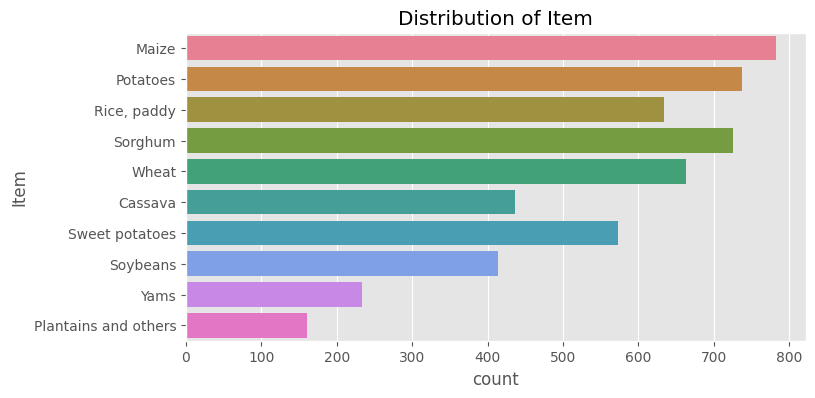

In [22]:
plt.figure(figsize=(8,4))
g1 = sns.countplot(hue=df_africa['Item'], y=df_africa['Item'], legend=False)
g1.set_title('Distribution of Item')
plt.show()

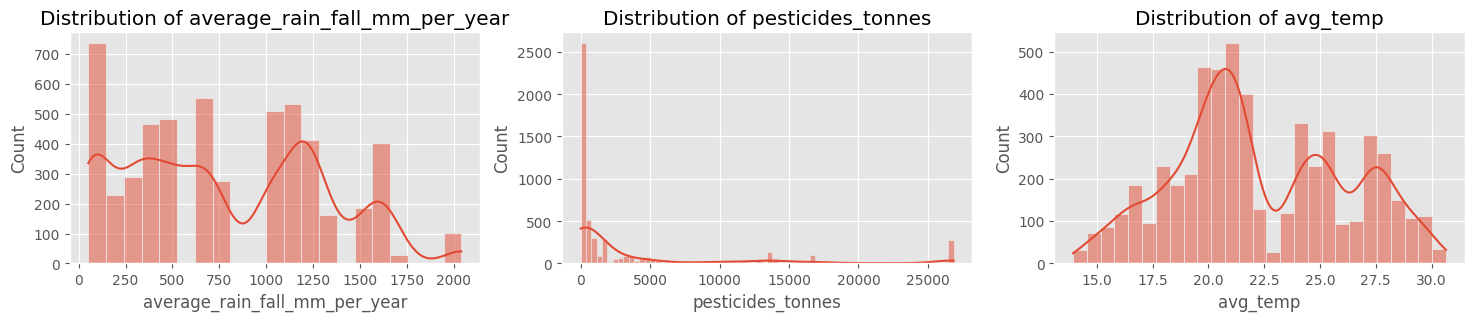

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 3))

g1=sns.histplot(df_africa["average_rain_fall_mm_per_year"], kde=True, ax=axes[0])
g2=sns.histplot(df_africa["pesticides_tonnes"], kde=True, ax=axes[1], label='Data')
g3=sns.histplot(df_africa["avg_temp"], kde=True, ax=axes[2], label='Data')


g1.set_title("Distribution of average_rain_fall_mm_per_year")
g2.set_title("Distribution of pesticides_tonnes")
g3.set_title("Distribution of avg_temp")

plt.show()

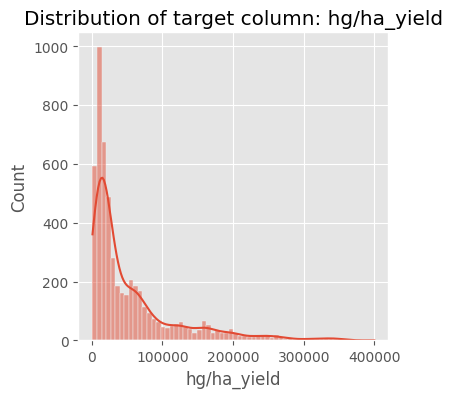

In [24]:
plt.figure(figsize=(4, 4))
g=sns.histplot(df_africa["hg/ha_yield"], kde=True, label='Data')
g.set_title("Distribution of target column: hg/ha_yield")

plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

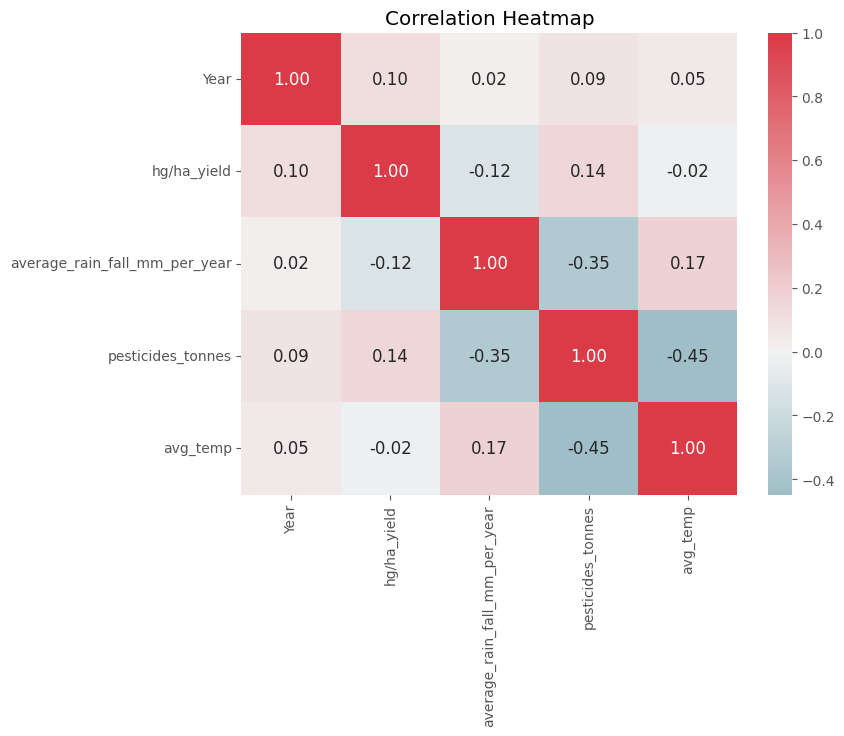

In [25]:
#Correlation Matrix
corr_matrix = df_africa.drop(['Area', 'Item'], axis=1).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f", center = 0, annot_kws={"size": 12}).set_title('Correlation Heatmap')

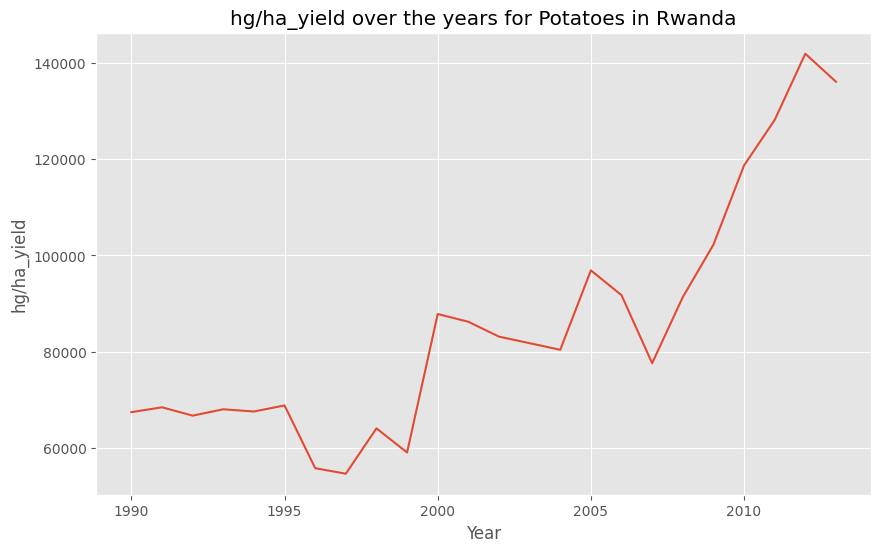

In [26]:
#Yield per country
def plot_data(area, item):
    plt.figure(figsize=(10,6))
    temp_df = df[(df['Area'] == area) & (df['Item'] == item)]
    plt.plot(temp_df['Year'], temp_df['hg/ha_yield'])
    plt.title(f'hg/ha_yield over the years for {item} in {area}')
    plt.xlabel('Year')
    plt.ylabel('hg/ha_yield')
    plt.grid(True)
    plt.show()

plot_data('Rwanda', 'Potatoes')

# **Building the model**

In [27]:
df_africa.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [28]:
df_africa.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
99,Algeria,Maize,1990,16500,89.0,1828.92,17.48
100,Algeria,Potatoes,1990,78936,89.0,1828.92,17.48
101,Algeria,"Rice, paddy",1990,28000,89.0,1828.92,17.48
102,Algeria,Sorghum,1990,16571,89.0,1828.92,17.48
103,Algeria,Wheat,1990,6315,89.0,1828.92,17.48


In [36]:
# Separate target variable
target = 'hg/ha_yield'
y = df_africa[target]

# Remove target from features
X = df_africa.drop(columns=[target])

# Define selected features BEFORE encoding
selected_features = ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item']

# Select only the features you want to use
X_selected = X[selected_features]

# Convert categorical variables to dummy variables
X_encoded = pd.get_dummies(X_selected, drop_first=True)

In [37]:
print("\nSplitting data into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
)


Splitting data into train and test sets...


# **Comparing models**

In [38]:
# Create the 3 models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Train and evaluate each model
results = {}

print("\nTraining and evaluating models...")
print("-" * 50)

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate scores
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'r2_score': r2,
        'mse': mse
    }

    # Print results
    print(f"{name}:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  MSE: {mse:.4f}")
    print()

# Find the best model (highest R² score)
best_model_name = max(results.keys(), key=lambda x: results[x]['r2_score'])
best_model = results[best_model_name]['model']
best_r2 = results[best_model_name]['r2_score']

print("=" * 50)
print(f"BEST MODEL: {best_model_name}")
print(f"Best R² Score: {best_r2:.4f}")
print("=" * 50)

# Save the best model
model_filename = f'best_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Best model saved as: {model_filename}")

# Save the feature names for future use (these will be the encoded feature names)
feature_names = X_encoded.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Feature names saved as: feature_names.pkl")
print(f"Total features after encoding: {len(feature_names)}")
print("Feature names:", feature_names)


Training and evaluating models...
--------------------------------------------------
Linear Regression:
  R² Score: 0.6427
  MSE: 1611022641.2806

Decision Tree:
  R² Score: 0.8845
  MSE: 520744756.4970

Random Forest:
  R² Score: 0.9060
  MSE: 423671639.3612

BEST MODEL: Random Forest
Best R² Score: 0.9060
Best model saved as: best_model.pkl
Feature names saved as: feature_names.pkl
Total features after encoding: 42
Feature names: ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area_Angola', 'Area_Botswana', 'Area_Burkina Faso', 'Area_Burundi', 'Area_Cameroon', 'Area_Central African Republic', 'Area_Egypt', 'Area_Eritrea', 'Area_Ghana', 'Area_Guinea', 'Area_Kenya', 'Area_Lesotho', 'Area_Libya', 'Area_Madagascar', 'Area_Malawi', 'Area_Mali', 'Area_Mauritania', 'Area_Mauritius', 'Area_Morocco', 'Area_Mozambique', 'Area_Namibia', 'Area_Niger', 'Area_Rwanda', 'Area_Senegal', 'Area_South Africa', 'Area_Sudan', 'Area_Tunisia', 'Area_Uganda', 'Area_Zambia', 'Area_Zimbabw

In [34]:
# def predict_single_point(results, X_test, y_test, point_index=0):
point_index = 0
"""
Make prediction on one single row from test data
"""
print(f"\nPREDICTING ON SINGLE DATA POINT (Row {point_index}):")
print("=" * 50)

# Get the single data point
single_point = X_test.iloc[point_index:point_index+1]
actual_value = y_test.iloc[point_index]

print("Input features for this data point:")
for feature, value in single_point.iloc[0].items():
    if value != 0:
        print(f"  {feature}: {value}")


print(f"\nActual yield: {actual_value:.2f}")
print("\nPredictions from each model:")
print("-" * 30)

prediction = best_model.predict(single_point)[0]
error = abs(prediction - actual_value)

print(f"{name}:")
print(f"  Predicted: {prediction:.2f}")
print(f"  Error: {error:.2f}")
print()


PREDICTING ON SINGLE DATA POINT (Row 0):
Input features for this data point:
  Year: 2006
  average_rain_fall_mm_per_year: 1180.0
  pesticides_tonnes: 88.0
  avg_temp: 23.95
  Area_Uganda: True
  Item_Plantains and others: True

Actual yield: 53989.00

Predictions from each model:
------------------------------
Random Forest:
  Predicted: 55496.41
  Error: 1507.41



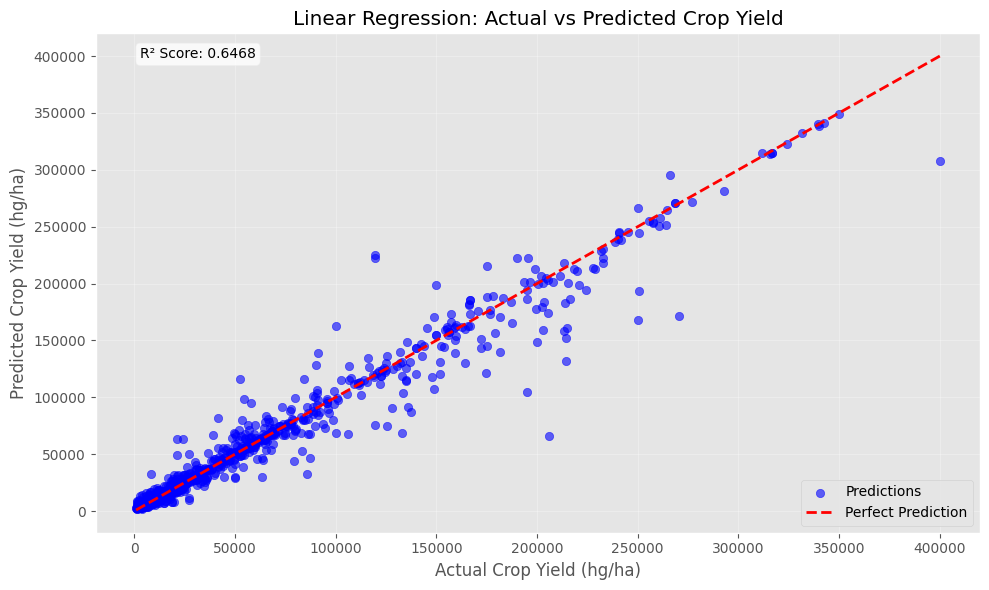

Linear Regression R² Score: 0.6468
The closer the points are to the red line, the better the predictions!


In [35]:
"""
Draw scatter plot showing the linear regression line
"""
import matplotlib.pyplot as plt
import numpy as np

# Get the linear regression model
lr_predictions = best_model.predict(X_test)

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot actual vs predicted points
plt.scatter(y_test, lr_predictions, alpha=0.6, color='blue', label='Predictions')

# Draw the perfect prediction line (diagonal)
min_val = min(y_test.min(), lr_predictions.min())
max_val = max(y_test.max(), lr_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual Crop Yield (hg/ha)')
plt.ylabel('Predicted Crop Yield (hg/ha)')
plt.title('Linear Regression: Actual vs Predicted Crop Yield')
plt.legend()
plt.grid(True, alpha=0.3)

# Add R² score on the plot
r2 = results['Linear Regression']['r2_score']
plt.text(0.05, 0.95, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes,
          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Linear Regression R² Score: {r2:.4f}")
print("The closer the points are to the red line, the better the predictions!")